In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rich import print

from seaborn import heatmap

from sklearn.model_selection import train_test_split

## Loading Dataset

In [2]:
# loading the dataset; skipping 13 lines of the file as include some information about the dataset

data = pd.read_csv('yeast-0-2-5-6_vs_3-7-8-9.dat', skiprows=13, 
                    names=['mcg','gvh','alm','mit','erl','pox','vac','nuc', 'class'] )

# getting some ifno about the data 
data.info(memory_usage='deep')


# number of positive and negative cases
print(data['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1004 non-null   float64
 1   gvh     1004 non-null   float64
 2   alm     1004 non-null   float64
 3   mit     1004 non-null   float64
 4   erl     1004 non-null   float64
 5   pox     1004 non-null   float64
 6   vac     1004 non-null   float64
 7   nuc     1004 non-null   float64
 8   class   1004 non-null   object 
dtypes: float64(8), object(1)
memory usage: 126.6 KB


## Get acquinted with the data distribution

In [3]:
data.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,0.509243,0.513406,0.491843,0.274133,0.504980,0.011086,0.501833,0.254054
std,0.133381,0.123622,0.092561,0.145602,0.049676,0.091811,0.056226,0.082927
min,0.190000,0.140000,0.210000,0.000000,0.500000,0.000000,0.130000,0.000000
25%,0.420000,0.430000,0.440000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.500000,0.500000,0.230000,0.500000,0.000000,0.510000,0.220000
75%,0.590000,0.580000,0.550000,0.350000,0.500000,0.000000,0.530000,0.270000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,0.830000


### Boxplots and Heatmaps to discover some anomaly in data

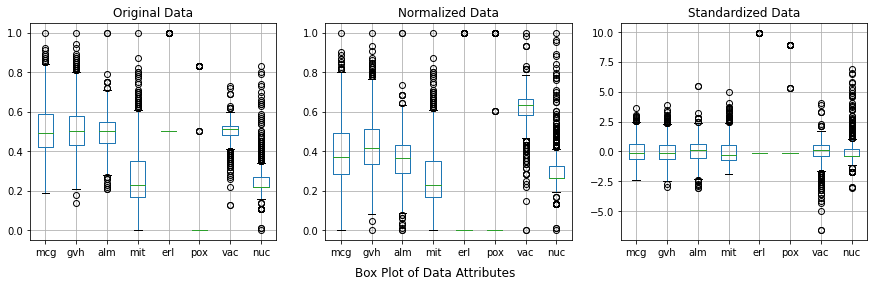

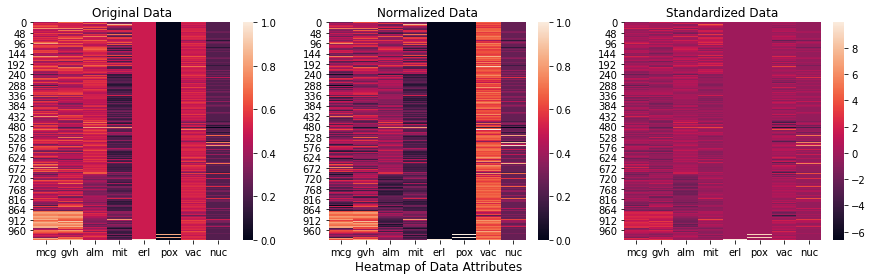

In [4]:
# normalizing the data in every column of DataFrame 
def normalize(df:pd.DataFrame, zscore:bool=False)->pd.DataFrame:
        df = df.copy()
        for c in df.columns:
            if df[c].dtype.name == 'float64':
                num = df[c].mean() if zscore else df[c].min()
                denom = df[c].std() if zscore else df[c].max() - df[c].min()
                df[c] = (df[c]-num)/denom
        return df
    
sdf = normalize(data)
zdf = normalize(data, zscore=True)

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
for i, (df, title) in enumerate(zip([data, sdf, zdf], ['Original', 'Normalized', 'Standardized'])):
    df.boxplot(ax=axes[i])
    axes[i].set_title(f'{title} Data')

fig.supxlabel("Box Plot of Data Attributes", verticalalignment='center')
plt.show()

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
for i, (df, title) in enumerate(zip([data, sdf, zdf], ['Original', 'Normalized', 'Standardized'])):
    heatmap(df.drop(columns=['class'], axis=1), ax=axes[i])
    axes[i].set_title(f'{title} Data')

fig.supxlabel("Heatmap of Data Attributes")
plt.show()


### Heatmap on correlation of the data

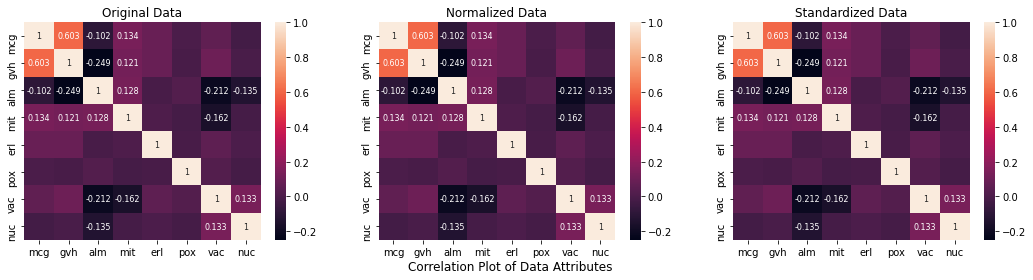

In [5]:
# Plottin the Correlation between astributes
fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for i, (df, title) in enumerate(zip([data, sdf, zdf], ['Original', 'Normalized', 'Standardized'])):
    labels = pd.DataFrame(df.corr()).applymap(
        lambda v: f"{v:0.3g}" if isinstance(v, (int, float)) and abs(v)>.1 else f"")
    heatmap(df.corr(), ax=axes[i], annot=labels, annot_kws={"fontsize":8}, fmt='s')
    axes[i].set_title(f'{title} Data')

fig.supxlabel("Correlation Plot of Data Attributes")
plt.show()

### Plotting the histograms of each attribute

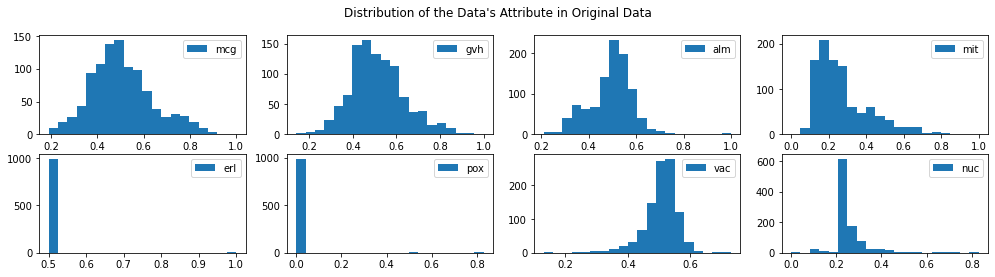

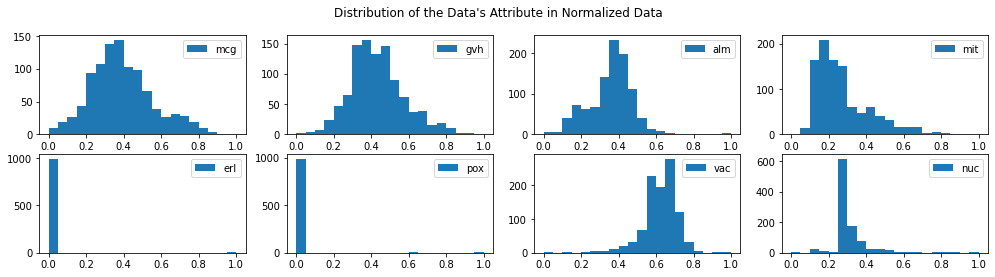

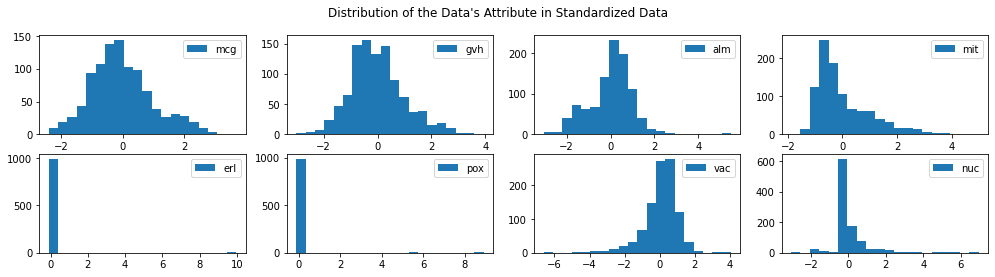

In [6]:
def histPlot(df:pd.DataFrame, label=None):
    fig, axes = plt.subplots(2,4, figsize=(17, 4))
    # unpack all the axes subplots
    axes = axes.ravel()

    for i, c in enumerate(df.columns):
        if df[c].dtypes.name != 'object':
            df.plot.hist(ax=axes[i], y=c, bins=20)
            axes[i].set_ylabel('')

    fig.suptitle("Distribution of the Data's Attribute" 
                 +f" in {label} Data" if label else "")
    plt.show()
    
for df, ylabel in zip((data, sdf, zdf), ('Original', 'Normalized', 'Standardized')):
    histPlot(df, ylabel)

In [7]:
print(data[['pox', 'class']].loc[data['pox']!=0])
print(data[['erl', 'class']].loc[data['erl']!=.5])

In [8]:
# The outliers in the dataset

data.loc[data['class']=='positive']

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
905,0.78,0.74,0.42,0.26,0.5,0.0,0.43,0.22,positive
906,0.75,0.70,0.38,0.27,0.5,0.0,0.49,0.22,positive
907,0.78,0.70,0.32,0.23,0.5,0.0,0.53,0.22,positive
908,0.74,0.72,0.47,0.25,0.5,0.0,0.57,0.22,positive
909,0.91,0.77,0.34,0.47,0.5,0.0,0.52,0.31,positive
...,...,...,...,...,...,...,...,...,...
999,0.78,0.74,0.58,0.25,1.0,0.0,0.53,0.22,positive
1000,0.77,0.80,0.51,0.40,1.0,0.0,0.54,0.22,positive
1001,0.85,0.56,0.33,0.38,1.0,0.0,0.55,0.25,positive
1002,0.86,0.92,0.50,0.37,1.0,0.0,0.53,0.32,positive


## Data Splitting for training and testing process

In [9]:
trainX, testX, trainy, testy = train_test_split(
    data.drop(columns=['class'],axis=1), data['class'], random_state=14)

trainX.shape, testX.shape, (trainy=='positive').sum(), (testy=='positive').sum()

((753, 8), (251, 8), 68, 31)

## One Class Classificatoin

In [43]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score, \
        precision_score, recall_score

# find the proportion of outliers we expect
outlier = data[data['class']=='positive'].shape[0]/data.shape[0]

def occ(df:pd.DataFrame, model):
    trainX, testX, trainy, testy = train_test_split(df.drop(columns=['class'],axis=1), df['class'], random_state=14)

    model = model.fit(trainX.loc[trainy=='negative'])
    yhat = model.predict(testX) 
    testy[testy == 'positive'], testy[testy == 'negative'] = -1, 1 # inliers 1, outliers -1
    testy = pd.to_numeric(testy)
    return accuracy_score(testy, yhat), precision_score(testy, yhat, pos_label=-1), recall_score(testy, yhat, pos_label=-1), \
            f1_score(testy, yhat, pos_label=-1), roc_auc_score(testy, yhat), classification_report(testy, yhat)

# One Class SVM model to detect outlier
ocsvm = OneClassSVM( gamma='scale', nu=outlier, kernel='rbf')
# Isolation Forest
isof = IsolationForest(contamination=outlier)
# Elliptic Envelope 
elc = EllipticEnvelope(contamination=outlier)


for model, title in zip((ocsvm, isof, elc), ('One Class SVM', 'Isolation Forest', 'Elliptic Envelope')):
    print(title.center(80,'='))
    for df in (sdf,):
        acc, pre, rec, f1, roc, cr = occ(df[['mcg','gvh','alm','mit','erl','pox','vac','nuc', 'class']], model)
        print(f"[b]Accuracy: {100*acc:.4f}, Precision: {100*pre:.2f}, Recall: {100*rec:.2f}, F1-Score: {100*f1:.2f}, ROC_AUC: {100*roc:.2f}[/b]")
        print(cr)